In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
import seaborn as sns
import re

BASE_DIR = "./"

def average_by_epoch(df_list, x, y):
    epochs = [tuple(df['epoch'].tolist()) for df in df_list]
    assert len(set(epochs)) == 1
    xs = [df[x].tolist() for df in df_list]
    ys = [df[y].tolist() for df in df_list]

    xs = pd.DataFrame(xs).T.mean(axis=1).tolist()
    ys = pd.DataFrame(ys).T.mean(axis=1).tolist()

    df = pd.DataFrame(zip(xs, ys), columns=[x, y])

    return df

def read_adjusted_ppl():
    def concate(path):
        dfs = []
        paths = glob(path)
        for p in paths:
            p = pd.read_csv(p)
            dfs.append(p)
        df = pd.concat(dfs)
        return df
    df_valid = concate("../data/adjusted_metrics/valid_*.csv")
    df_test = concate("../data/adjusted_metrics/test_*.csv")
    df_valid = df_valid.drop_duplicates()
    df_test = df_test.drop_duplicates()
    return df_valid, df_test


def join_adjusted_ppl(path):
    df = pd.read_csv(p)
    df1 = pd.merge(df, DF_V, on='model_path')
    print(df1.shape[0], df.shape[0])
    assert df1.shape[0] == df.shape[0]
    return df1


DF_V, DF_T = read_adjusted_ppl()

COLORS = ['black', 'mediumseagreen', 'darkorange']
MARKERS = ['.', '+', '^']
AVERAGE = True

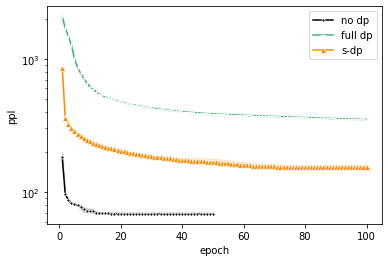

In [34]:
## ppl vs epoch
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
df_partialdps = pd.concat(df_partialdps)


ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_nodps[df_nodps.epoch!=0], color=COLORS[0], marker=MARKERS[0], label='no dp')
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_dps[df_dps.epoch!=0], color=COLORS[1], marker=MARKERS[1], label='full dp')
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_partialdps[df_partialdps.epoch!=0], color=COLORS[2], marker=MARKERS[2], label='s-dp')
plt.legend(loc="upper right", prop={'size':10})
plt.xlabel('epoch')
plt.ylabel('ppl')
plt.yscale('log')

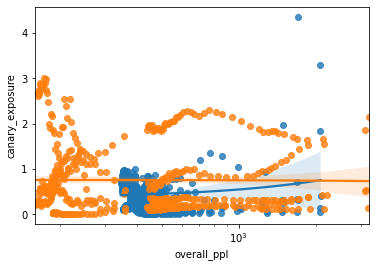

In [77]:
## Canary insertion
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
df_partialdps = pd.concat(df_partialdps)

xvar = 'overall_ppl'
yvar = 'canary_exposure'
plotfunc = sns.regplot
df1 = df_nodps[df_nodps.epoch!=0]
df2 = df_dps[df_dps.epoch!=0]
df3 = df_partialdps[df_partialdps.epoch!=0]

# ax = plotfunc(x=xvar, y=yvar, data=df1)
ax = plotfunc(x=xvar, y=yvar, data=df2)
ax = plotfunc(x=xvar, y=yvar, data=df3)
plt.xscale('log')

72 72
72 72
72 72
72 72
72 72
101 101
101 101
101 101
101 101
101 101
150 150
150 150
150 150
150 150
150 150
100 100
150 150
100 100


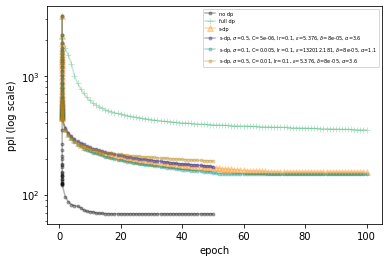

In [8]:
from matplotlib import colors as mcolors


default_colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())[8:]

default_colors = ['darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet']

#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=1
alpha = 0.3
x_var = 'epoch'
metrics = 'overall_ppl'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = plt.plot

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], #s=dot_size, 
    alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], #s=dot_size, 
    alpha=alpha, label='full dp', marker=MARKERS[1])



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


# for other parameters
#partial dp
df_partialdps_params = []
for p in glob(os.path.join(BASE_DIR, "membership_inference/partialdp/final_fix/param_search", "*.csv")):
    try:
        if ("sigma0.1_norm0.005_seed1111_100epochs" in p) or ("sigma0.5_norm0.01" in p) or ("sigma0.5_norm5e-06" in p):
            df_partialdps_params.append(join_adjusted_ppl(p))
    except:
        print(p)
# df_partialdps = pd.concat(df_partialdps)


for i, df_partialdp_param in enumerate(df_partialdps_params):
    matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp_param.iloc[-1]['model_path'])
    lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    # label = "s-dp"
    label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp_param.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp_param.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp_param.iloc[-1]['model_alpha']}"
    scatters = plot_func(df_partialdp_param[x_var].tolist()[1:], df_partialdp_param[metrics].tolist()[1:], color=default_colors[i], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[0])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))



# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':5})
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('ppl (log scale)')
plt.show()

In [29]:
glob(os.path.join(BASE_DIR, "membership_inference/partialdp/final_fix/param_search", "*.csv"))

['./membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.05_norm0.25_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.5_norm0.005_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.5_norm5e-06_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.5_norm5e-05_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.05_norm0.005_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.1_norm0.25_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.1_norm0.005_seed1111_100epochs.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.45_norm0.01_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.45_norm0.005_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.01_norm0.25_seed1111.csv',
 './membe

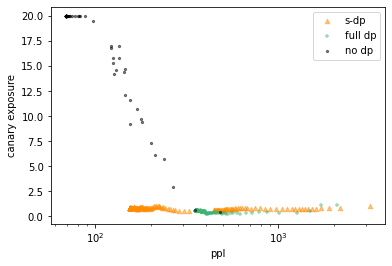

In [63]:
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.5
x_var = 'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])







# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('canary exposure')
plt.show()

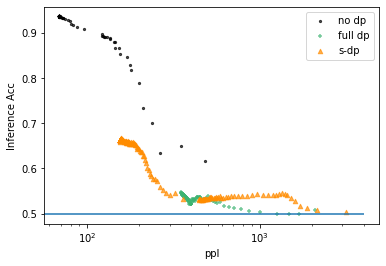

In [57]:
# membership inference
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp", "final_fix", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter
plt.hlines(0.5, xmin=0, xmax=4000)

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]




for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('Inference Acc')
plt.show()

73 73
73 73
73 73
73 73
73 73
150 150
150 150
150 150
150 150
150 150


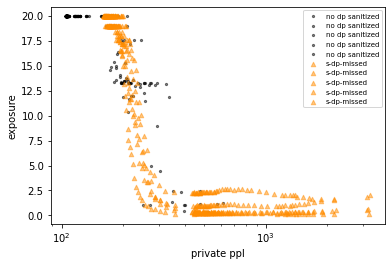

In [39]:
# missed experiments
#nodp normalized

df_nodps_normalized = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized", "*")):
    df_nodps_normalized.append(join_adjusted_ppl(p))

#partial dp missed
df_partialdps_missed = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed", "*")):
    df_partialdps_missed.append(join_adjusted_ppl(p))





# missed
dot_size=20
alpha = 0.5
# x_var, y_var = "canary_ppl", "canary_exposure"
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if False:
    # df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_nodps_normalized = [average_by_epoch(df_nodps_normalized, x_var, y_var)]
    df_partialdps_missed = [average_by_epoch(df_partialdps_missed, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter


# for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
#     plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')


for i, df_nodp_normalized in enumerate(df_nodps_normalized):
    plot_func(df_nodp_normalized[x_var].tolist()[1:], df_nodp_normalized[y_var].tolist()[1:], color=COLORS[0], marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized')




for i, df_partialdp in enumerate(df_partialdps_missed):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[y_var].tolist()[1:], color=COLORS[2], marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)
        # scatters.set_color(cm(i//1*1.0/NUM_COLORS))





# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="upper right", prop={'size':7})
plt.xscale('log')
plt.xlabel('private ppl')
plt.ylabel('exposure')
plt.show()

In [10]:
    df = pd.read_csv('./canary_insertion/partialdp_missed_1/lr0.1_sigma0.5_norm0.001_seed123.csv')
    df1 = pd.merge(df, DF_V, on='model_path')


In [13]:
set(df['model_path']) - set(df1['model_path'])

{'model/partialdp/20210506/234042/data-wikitext-2-add1b_model-LSTM_ebd-200_hid-200_bi-False_lay-1_tie-False_tok-50258_bs-7_bptt-35_lr-0.1_dp-True_partial-True_0hidden-False_sigma-0.5_norm-0.001_dl-8e-05.pt_ppl-172.1362021_acc-0.30066_epoch-100_ep-6.948_dl-8e-05_ap-3.30'}

73 73
73 73
73 73
73 73
73 73
150 150
150 150
150 150
150 150
150 150


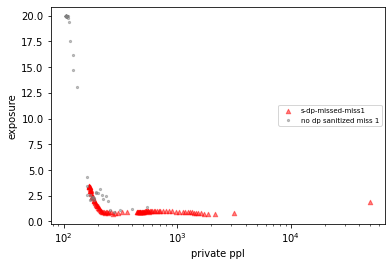

In [31]:
# missed experiments, miss 1
#nodp normalized
df_nodps_normalized_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_miss1", "*")):
    df_nodps_normalized_miss1.append(join_adjusted_ppl(p))

#nodp normalized
df_partialdps_missed_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed_1", "*.csv")):
    try:
        df_partialdps_missed_miss1.append(join_adjusted_ppl(p))
    except:
        print(p)

# missed
dot_size=20
alpha = 0.5
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if True:
    # pass
    df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_partialdps_missed_miss1 = [average_by_epoch(df_partialdps_missed_miss1, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter



for i, df_partialdp in enumerate(df_partialdps_missed_miss1):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed-miss1"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist(), df_partialdp[y_var].tolist(), color='red', marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)

for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
    plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')




# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="right", prop={'size':7})
plt.xscale('log')
plt.xlabel('private ppl')
plt.ylabel('exposure')
plt.show()

73 73
73 73
73 73
73 73
73 73
150 150
122 122


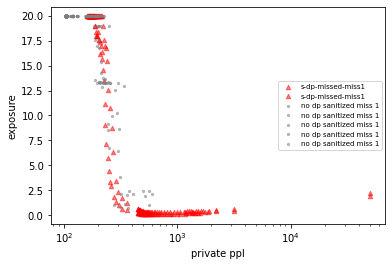

In [33]:
# missed experiments, append
#nodp normalized
df_nodps_normalized_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_append10", "*.csv")):
    df_nodps_normalized_miss1.append(join_adjusted_ppl(p))

#nodp normalized
df_partialdps_missed_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed_append", "*.csv")):
    try:
        df_partialdps_missed_miss1.append(join_adjusted_ppl(p))
    except:
        print(p)

# missed
dot_size=20
alpha = 0.5
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if False:
    # pass
    df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_partialdps_missed_miss1 = [average_by_epoch(df_partialdps_missed_miss1, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter



for i, df_partialdp in enumerate(df_partialdps_missed_miss1):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed-miss1"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist(), df_partialdp[y_var].tolist(), color='red', marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)

for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
    plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')




# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="right", prop={'size':7})
plt.xscale('log')
plt.xlabel('private ppl')
plt.ylabel('exposure')
plt.show()

73 73
73 73
73 73
73 73
73 73
137 137
135 135


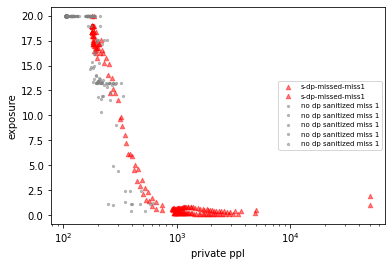

In [34]:
# missed experiments, both unk and digits
#nodp normalized
df_nodps_normalized_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized", "*.csv")):
    df_nodps_normalized_miss1.append(join_adjusted_ppl(p))

#nodp normalized
df_partialdps_missed_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed_both_unk_digits", "*.csv")):
    try:
        df_partialdps_missed_miss1.append(join_adjusted_ppl(p))
    except:
        print(p)

# missed
dot_size=20
alpha = 0.5
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if False:
    # pass
    df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_partialdps_missed_miss1 = [average_by_epoch(df_partialdps_missed_miss1, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter



for i, df_partialdp in enumerate(df_partialdps_missed_miss1):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed-miss1"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist(), df_partialdp[y_var].tolist(), color='red', marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)

for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
    plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')




# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="right", prop={'size':7})
plt.xscale('log')
plt.xlabel('private ppl')
plt.ylabel('exposure')
plt.show()

73 73
130 130
129 129


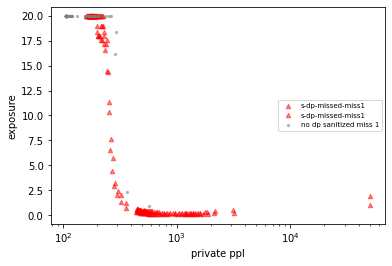

In [35]:
# missed experiments, both unk and digits
#nodp normalized
df_nodps_normalized_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_miss20", "*.csv")):
    df_nodps_normalized_miss1.append(join_adjusted_ppl(p))

#nodp normalized
df_partialdps_missed_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed_20", "*.csv")):
    try:
        df_partialdps_missed_miss1.append(join_adjusted_ppl(p))
    except:
        print(p)

# missed
dot_size=20
alpha = 0.5
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if False:
    # pass
    df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_partialdps_missed_miss1 = [average_by_epoch(df_partialdps_missed_miss1, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter



for i, df_partialdp in enumerate(df_partialdps_missed_miss1):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed-miss1"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist(), df_partialdp[y_var].tolist(), color='red', marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)

for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
    plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')




# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="right", prop={'size':7})
plt.xscale('log')
plt.xlabel('private ppl')
plt.ylabel('exposure')
plt.show()

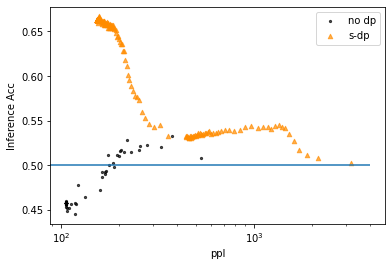

In [121]:
# missed membership inference
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp_normalized", "final_fix", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)


#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter
plt.hlines(0.5, xmin=0, xmax=4000)

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]




for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('Inference Acc')
plt.show()

111 111
111 111
110 110
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


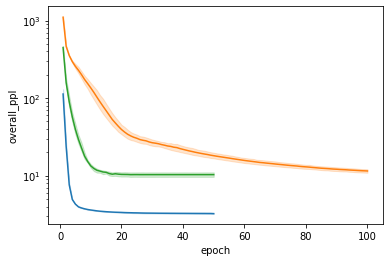

In [9]:
## dialog, ppl vs epoch
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", "bs32", "lr0.5_bs4", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
df_partialdps = pd.concat(df_partialdps)


ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_nodps[df_nodps.epoch!=0])
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_dps[df_dps.epoch!=0])
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_partialdps[df_partialdps.epoch!=0])
plt.yscale('log')

111 111
111 111
111 111
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


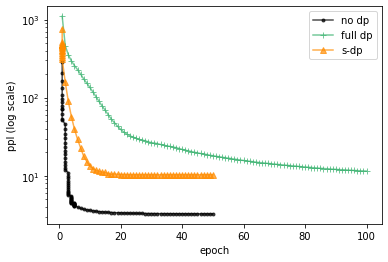

In [12]:
## dialog, ppl vs epoch
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", "bs32", "lr0.5_bs4", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)



dot_size=3
alpha = 0.7
x_var = 'epoch'
metrics = 'overall_ppl'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = plt.plot

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], #s=dot_size, 
    alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], #s=dot_size, 
    alpha=alpha, label='full dp', marker=MARKERS[1])



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))



# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':10})
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('ppl (log scale)')
plt.show()

111 111
111 111
111 111
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


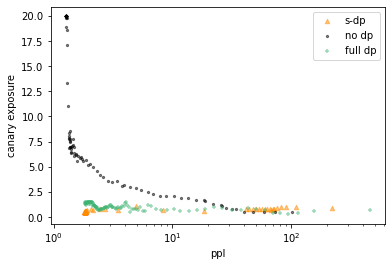

In [13]:
# dialog, canary insertion
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", "bs32", "lr0.5_bs4", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.5
x_var = 'nonprivate_ppl'#'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('canary exposure')
plt.show()

111 111
111 111
111 111
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


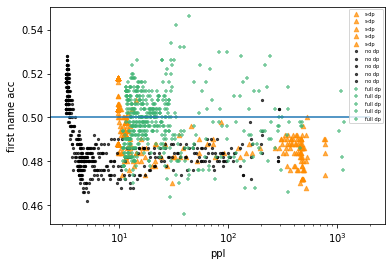

In [21]:
# dialog, membership inference, full name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix", "lr0.5_bs4",  "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

plt.hlines(0.5, xmin=0, xmax=2000)

# average
if False:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('first name acc')
plt.show()

111 111
111 111
111 111
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


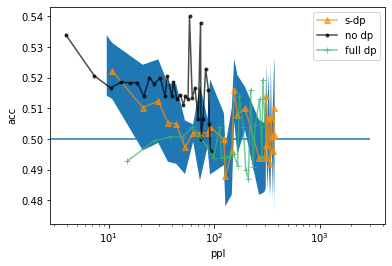

In [34]:
# dialog, membership inference, first name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix_firstname", "lr0.5_bs4", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix_firstname", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix_firstname", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.plot
plt.hlines(0.5, xmin=0, xmax=3000)

# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], 
    # s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    plt.fill_between(df_partialdp[x_var], df_partialdp[metrics]-df_partialdp['y_std'], df_partialdp[metrics]+df_partialdp['y_std'])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], 
    # s=dot_size, 
    alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], 
    # s=dot_size, 
    alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size': 10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()

In [30]:
# dialog, membership inference, first name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix_firstname", "lr0.5_bs4", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix_firstname", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix_firstname", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.plot
plt.hlines(0.5, xmin=0, xmax=3000)

# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics, nbins=50)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics, nbins=50)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics, nbins=50)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size': 10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()

111 111
111 111
111 111
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


AttributeError: 'Line2D' object has no property 's'

111 111
111 111
111 111
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


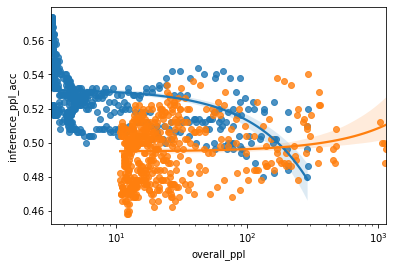

In [49]:
# dialog, membership inference, first name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix_firstname", "lr0.5_bs4", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix_firstname", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix_firstname", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
df_partialdps = pd.concat(df_partialdps)

xvar = 'overall_ppl'
yvar = 'inference_ppl_acc'
plotfunc = sns.regplot
df1 = df_nodps[df_nodps.epoch!=0]
df2 = df_dps[df_dps.epoch!=0]
df3 = df_partialdps[df_partialdps.epoch!=0]

ax = plotfunc(x=xvar, y=yvar, data=df1)
ax = plotfunc(x=xvar, y=yvar, data=df2)
ax = plotfunc(x=xvar, y=yvar, data=df3)
plt.xscale('log')

In [46]:
df_nodps.to_csv('canary_insertion/dialog/nodp/test/forggplot_test.csv', index=None)

73 73
73 73
73 73
73 73
73 73
101 101
101 101
101 101
101 101
101 101
150 150
150 150
150 150
150 150
150 150


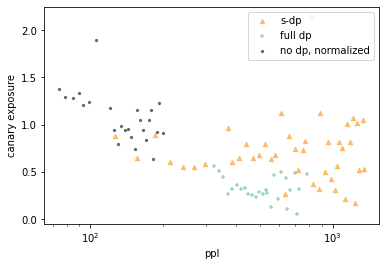

In [35]:
# canary, normalized no miss
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_nomiss", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.5
x_var = 'nonprivate_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp, normalized', marker=MARKERS[0])







# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('canary exposure')
plt.show()

In [56]:
# dialog, membership inference, first name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix_firstname", "lr0.5_bs4", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix_firstname", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix_firstname", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.hist
plt.hlines(0.5, xmin=0, xmax=3000)

# average
if False:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size': 10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()

111 111
111 111
111 111
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


TypeError: string indices must be integers

In [24]:
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix_firstname", "lr0.5_bs4", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

df_nodps = average_by_epoch(df_nodps, 'overall_ppl', 'inference_ppl_acc')

111 111
111 111
111 111
111 111
111 111


In [53]:
df_nodps.head()


,epoch,model_ppl,model_acc,model_epsilon,model_delta,model_alpha,inference_ppl_acc,inference_lower_ppl_acc,inference_gpt2_acc,inference_zlip_acc,TOTAL_CANDIDATES,model_path,overall_ppl,overall_acc,nonprivate_ppl,nonprivate_acc,private_ppl,private_acc
0,0,50302.334477,0.00000,0.0,0.0,0.0,0.508,0.512,0.460,0.488,1000,model/nodp/20210511/201555/data-simdial_model-...,50302.340080,0.000000,50331.206985,0.000000,50174.317513,0.00000
1,1,287.811429,0.07909,0.0,0.0,0.0,0.480,0.496,0.462,0.494,1000,model/nodp/20210511/201555/data-simdial_model-...,287.811426,0.079095,102.064360,0.093026,28758.293578,0.01722
2,1,205.310662,0.07909,0.0,0.0,0.0,0.484,0.488,0.462,0.488,1000,model/nodp/20210511/201555/data-simdial_model-...,205.310656,0.079095,72.664583,0.093026,20694.887905,0.01722
3,1,161.701708,0.08880,0.0,0.0,0.0,0.502,0.484,0.462,0.502,1000,model/nodp/20210511/201555/data-simdial_model-...,161.701700,0.088802,58.324900,0.104919,14983.799373,0.01722
4,1,127.097320,0.12689,0.0,0.0,0.0,0.504,0.482,0.462,0.506,1000,model/nodp/20210511/201555/data-simdial_model-...,127.097316,0.126893,46.271239,0.151587,11301.118108,0.01722


In [5]:
x='overall_ppl'
nbins=100
df = df_nodps
df = df[df.epoch != 0]

bin_size = (df[x].max() - df[x].min())/nbins

bins = []
for i in range(-1, nbins+1):
    bins.append(df[x].min() + i*bin_size)

df['binned'] = pd.cut(df[x], bins)

<ipython-input-5-eb6154a7327c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['binned'] = pd.cut(df[x], bins)


In [6]:
df.head()

,epoch,model_ppl,model_acc,model_epsilon,model_delta,model_alpha,inference_ppl_acc,inference_lower_ppl_acc,inference_gpt2_acc,inference_zlip_acc,TOTAL_CANDIDATES,model_path,overall_ppl,overall_acc,nonprivate_ppl,nonprivate_acc,private_ppl,private_acc,binned
1,1,287.811429,0.07909,0.0,0.0,0.0,0.480,0.496,0.462,0.494,1000,model/nodp/20210511/201555/data-simdial_model-...,287.811426,0.079095,102.064360,0.093026,28758.293578,0.01722,"(286.852, 289.717]"
2,1,205.310662,0.07909,0.0,0.0,0.0,0.484,0.488,0.462,0.488,1000,model/nodp/20210511/201555/data-simdial_model-...,205.310656,0.079095,72.664583,0.093026,20694.887905,0.01722,"(203.765, 206.63]"
3,1,161.701708,0.08880,0.0,0.0,0.0,0.502,0.484,0.462,0.502,1000,model/nodp/20210511/201555/data-simdial_model-...,161.701700,0.088802,58.324900,0.104919,14983.799373,0.01722,"(160.788, 163.653]"
4,1,127.097320,0.12689,0.0,0.0,0.0,0.504,0.482,0.462,0.506,1000,model/nodp/20210511/201555/data-simdial_model-...,127.097316,0.126893,46.271239,0.151587,11301.118108,0.01722,"(126.408, 129.273]"
5,1,103.553410,0.19491,0.0,0.0,0.0,0.504,0.498,0.462,0.510,1000,model/nodp/20210511/201555/data-simdial_model-...,103.553415,0.194911,37.227949,0.234920,9737.416370,0.01722,"(103.487, 106.352]"


In [16]:
x, y = df.groupby('binned')['overall_ppl'].mean(), df.groupby('binned')['inference_ppl_acc'].mean()

In [14]:
df.binned.value_counts()

(3.209, 6.074]        368
(6.074, 8.939]         37
(8.939, 11.804]        17
(11.804, 14.67]        12
(14.67, 17.535]        10
                     ... 
(186.574, 189.439]      0
(189.439, 192.304]      0
(192.304, 195.169]      0
(195.169, 198.034]      0
(143.598, 146.463]      0
Name: binned, Length: 101, dtype: int64

In [22]:

pd.isnull(x.tolist()[-2])

True

In [15]:
x_new_values, y_new_values = df.groupby('binned')[x].mean(), df.groupby('binned')[y].mean()

NameError: name 'y' is not defined

In [29]:
def average_by_epoch(df_list, x, y, nbins=100):
    df = pd.concat(df_list)
    df = df[df.epoch != 0]

    bin_size = (df[x].max() - df[x].min())/nbins

    bins = []
    for i in range(-1, nbins+1):
        bins.append(df[x].min() + i*bin_size)

    df['binned'] = pd.cut(df[x], bins)

    x_new_values, y_new_values, y_std = df.groupby('binned')[x].mean(), df.groupby('binned')[y].mean(), df.groupby('binned')[y].std()

    x_new_values = [n for n in x_new_values if not pd.isnull(n)]
    y_new_values = [n for n in y_new_values if not pd.isnull(n)]
    y_std = [n for n in y_std if not pd.isnull(n)]

    df = pd.DataFrame(zip(x_new_values, y_new_values, y_std), columns=[x, y, 'y_std'])

    return df

111 111
111 111
111 111
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


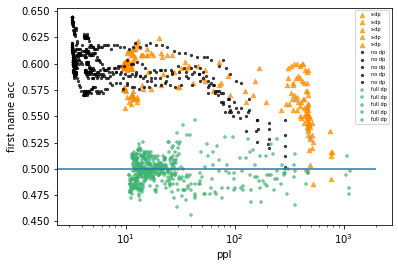

In [38]:
# dialog, membership inference, full name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix_firstname_fromUSCensus", "lr0.5_bs4",  "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix_firstname_fromUSCensus", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

plt.hlines(0.5, xmin=0, xmax=2000)

# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('first name acc')
plt.show()